# Step 1: Question
### how often news anchors interuppt and how often they are interrupted

# Step 2: Data gathering and cleaning
### 2.1 Data Gathering 
#### we will collect data from transcripts of CNN interviews

In [3]:
#lets scrape data from the cnn website using requests and beautiful soup
import requests
from bs4 import BeautifulSoup


def get_data_from_url(urls):
    text=[]
    for show in urls:
        show_txt=[]
        for url in show:
            page=requests.get(url).text
            soup= BeautifulSoup(page, 'lxml')
            for br in soup.find_all("br"):
                br.replace_with("\n")
            txt=[p.text for p in soup.find(class_="cnnBoxContent").find_all('p')]
            txt=txt[5:]
            show_txt.append(''.join(txt))
        #print(len(show_txt))
        show_txt=''.join(show_txt)
        #print(len(show_txt))
        text.append(show_txt)
   # print(text)
    return text
urls=[
    [
    'http://transcripts.cnn.com/TRANSCRIPTS/2008/14/acd.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2009/08/acd.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2010/12/acd.01.html'
    ], 
    [
    'http://transcripts.cnn.com/TRANSCRIPTS/2008/19/sitroom.02.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2009/29/sitroom.02.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2010/13/sitroom.01.html'
    ],
    [
     'http://transcripts.cnn.com/TRANSCRIPTS/2008/11/cnnt.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2009/21/cnnt.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2010/15/cnnt.01.html'   
    ],
    [
    'http://transcripts.cnn.com/TRANSCRIPTS/2008/23/sotu.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2009/13/sotu.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2010/18/sotu.01.html'
    ],
    [
    'http://transcripts.cnn.com/TRANSCRIPTS/2008/27/ampr.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2009/08/ampr.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2010/12/ampr.01.html'
    ],
    [
    'http://transcripts.cnn.com/TRANSCRIPTS/2007/12/sotu.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2008/02/sotu.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2009/06/sotu.01.html'

    ],
    [
    'http://transcripts.cnn.com/TRANSCRIPTS/2008/31/fmjc.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2009/02/fmjc.01.html'
    ],
    [
    'http://transcripts.cnn.com/TRANSCRIPTS/2008/11/ebo.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2009/23/ebo.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/2010/26/ebo.01.html'  
    ],
    [
     'http://transcripts.cnn.com/TRANSCRIPTS/1908/17/vjs.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/1909/07/vjs.01.html',
    'http://transcripts.cnn.com/TRANSCRIPTS/1910/05/vjs.01.html'
   
    ]
     ]


shows=['acd', 'sitroom', 'cnnt', 'sotu-j', 'ampr', 'sotu-d' ,'fmjc', 'ebo', 'vjs' ]




In [4]:
# lets get the transcripts for the news anchors
#transcripts=get_data_from_url(urls)

In [5]:
#pickle the data for later use
#!mkdir /home/luna/Desktop/work/opian/NLP/news_transcriptions/transcripts
import pickle
#for i, a, in enumerate(shows):
 #   with open("/home/luna/Desktop/work/opian/NLP/news_transcriptions/transcripts/" + a + ".txt", 'wb') as file:
  #      pickle.dump(transcripts[i], file)

In [6]:
#load pickled files
data={}
for i, a, in enumerate(shows):
    with open("/home/luna/Desktop/work/opian/NLP/news_transcriptions/transcripts/" + a + ".txt", 'rb') as file:
        data[a]=pickle.load(file)


In [7]:
anchors= ['COOPER', 'BLITZER', 'TAPPER', 'LEMON', 'AMANPOUR', 'BURNETT', 'BASH','ASHER', 'JONES'  ]


## 2.2 Data Cleaning

-lowercasing <br>
-remove numbers <br>
-remove punctuations except interuption indicators<br>
-identify the number of people in the interview<br>

first, let us get the transcript for each anchor only, leaving out the other people in the converstations.(for now)


In [8]:
#lets change into dataframe format
import pandas as pd
pd.set_option('max_colwidth',150)

show_transcript = pd.DataFrame.from_dict(data[idx] for idx in data.keys())#.transpose()
show_transcript.columns=['transcript']
show_transcript.index=shows
#show_transcript=show_transcript.drop(columns=['short', 'headline', 'airtime', 'description' ])
show_transcript = show_transcript.sort_index()
show_transcript


,transcript
acd,"\nKATE BOLDUAN, CNN HOST: For sure. Great to see you, Kyung. Great piece. Thank you very much. And thank you all so much for joining us tonight. I..."
ampr,"\n(COMMERCIAL BREAK)\n \n[14:00:00]\n \nCHRISTIANE AMANPOUR, CHIEF INTERNATIONAL CORRESPONDENT: Hello, everyone, and welcome to ""Amanpour."" Here..."
cnnt,"\n[22:00:00] \n \nDON LEMON, CNN HOST: This is CNN TONIGHT. I'm Don Lemon. And thank you so much for joining. \n \nI want to do something a little..."
ebo,"\nJIM ACOSTA, CNN HOST: We'll all be watching tomorrow. Those two candidates are together on the same stage. \n \nAnd I'm Jim Acosta. Thanks very ..."
fmjc,"\n[09:00:35] \n \nZAIN ASHER, CNN INTERNATIONAL ANCHOR: Coming to you live from New York, I'm Zain Asher. This is FIRST MOVE and here is your ne..."
sitroom,"\n[18:00:35] \n \nANNOUNCER: This is CNN breaking news. \n \nWOLF BLITZER, CNN HOST: Welcome to our viewers here in the United States and around t..."
sotu-d,"\n[09:00:17]\n \n(BEGIN VIDEOTAPE)\n \nDANA BASH, CNN HOST (voice-over): Back to school? The president pushes schools to fully reopen, ignoring s..."
sotu-j,"\n[09:00:16]\n \n(BEGIN VIDEOTAPE)\n \nJAKE TAPPER, CNN HOST (voice-over): You have got mail. With the postal director in the hot seat over mail..."
vjs,"\n[19:00:00]\n \n(COMMERCIAL BREAK) \n \nVAN JONES, HOST, CNN: Welcome to The Van Jones Show. Look, tonight we're going to get inside two great le..."


In [9]:
#re.findall(r'[a-z]\.\.\.\s\n',"s... \n")
#re.findall(r'--\s\n[A-Z]{2}[A-Z]*','-- \nASE')

In [10]:
dummy=show_transcript.loc['cnnt']['transcript'].split()
#print(dummy)

import re
def get_crosstalk(text):
    crosstalk=0
    #print(text)
    for word in text:
        found_event=re.findall(r'\(([A-Z]+)\)*', word)
              # found_name=re.findall(r'[A-Z]{2}[A-Z]*', word)
        
        if(found_event and found_event[0]=='CROSSTALK'):
            crosstalk=crosstalk+1
            #print(found_event)
    return crosstalk

def remove_events(text):
   # text=re.sub(r'\(([A-Z]+\s[A-Z]+)\)*','', text)#remove videoclip, laughter, etc
    text=re.sub(r'\((.*?)\)','', text)
    text=re.sub(r'\[([A-Za-z0-9_:]+)\]','', text)#remove timestamps
    
    return text
              # found_name=re.findall(r'[A-Z]{2}[A-Z]*', word)
def get_names(text):
    return_names=[]
    found_names=re.findall(r'[A-Z]{2}[A-Z]*', text)
    for found_name in found_names:
        if(found_name in anchors and not(found_name in return_names)):
            return_names.append(found_name)
    return return_names
round1= lambda x: remove_events(x)
def count_interruptions(text):
    found_interuptions=[]
    found_interuptions=re.findall(r'[a-z]\.\.\.\n',text)
    found_interuptions= found_interuptions+ re.findall(r'[a-z]\.\.\.\s\n',text)
    found_interuptions= found_interuptions+ re.findall(r'--\s\n',text)
    found_interuptions= found_interuptions+ re.findall(r'--\n',text)
    #print(found_interuptions)
    return len(found_interuptions)
def count_interruptions_per_anchor(text):
    found_interuptions=[]
    found_interuptions=re.findall(r'[a-z]\.\.\.\n',text)
    found_interuptions= found_interuptions+ re.findall(r'[a-z]\.\.\.\s\n',text)
    found_interuptions= found_interuptions+ re.findall(r'--\s\n',text)
    found_interuptions= found_interuptions+ re.findall(r'--\n',text)
    #print(found_interuptions)
    return len(found_interuptions)
def get_paragraphs(text):
    speaker_name=[]
    found_names=re.findall(r'\s[A-Z]{2}[A-Z]*[\-]*[A-Z]*:', text)
    #print(found_names)
    for found_name in found_names:
        speaker_name=speaker_name+re.findall(r'[A-Z]+[\-]*[A-Z]*', found_name)
    speaker_par=[]
    for paragraph in re.split(r'\s[A-Z]{2}[A-Z]*[\-]*[A-Z]*:', text):
        #print(paragraph)
        if(paragraph):
            speaker_par.append(paragraph)
    speaker_transcript=pd.DataFrame()
    #print(speaker_name)
    #print(len(speaker_par))
    speaker_transcript['speaker']=speaker_name
    if(len(speaker_name)==len(speaker_par)):
        speaker_transcript['transcript']=speaker_par
    else:
        speaker_transcript['transcript']=speaker_par[1:]
    
    speaker_transcript= speaker_transcript.loc[speaker_transcript['speaker'].isin(anchors)]
    
    speaker_transcript=speaker_transcript.groupby(['speaker'], as_index=False).agg(''.join)
    #print(speaker_transcript)
    return speaker_transcript

#count_interruptions("s...BGH")
data_clean=pd.DataFrame()
data_clean['total_number_of_crosstalk']=pd.DataFrame(show_transcript.transcript.apply(lambda x: get_crosstalk(x.split()))).transcript.tolist()
data_clean['transcript'] = pd.DataFrame(show_transcript.transcript.apply(round1)).transcript.tolist()
data_clean['names']=pd.DataFrame(data_clean.transcript.apply(lambda x: get_names(x))).transcript.tolist()
data_clean['total_interruptions']=pd.DataFrame(data_clean.transcript.apply(lambda x: count_interruptions(x))).transcript.tolist()
data_clean#.loc[1].transcript

,total_number_of_crosstalk,transcript,names,total_interruptions
0,2,"\nKATE BOLDUAN, CNN HOST: For sure. Great to see you, Kyung. Great piece. Thank you very much. And thank you all so much for joining us tonight. I...","[COOPER, JONES, BURNETT, TAPPER]",15
1,2,"\n\n \n\n \nCHRISTIANE AMANPOUR, CHIEF INTERNATIONAL CORRESPONDENT: Hello, everyone, and welcome to ""Amanpour."" Here's what's coming up.\n \n\n ...","[AMANPOUR, JONES, BASH]",40
2,37,"\n \n \nDON LEMON, CNN HOST: This is CNN TONIGHT. I'm Don Lemon. And thank you so much for joining. \n \nI want to do something a little bit unort...",[LEMON],61
3,2,"\nJIM ACOSTA, CNN HOST: We'll all be watching tomorrow. Those two candidates are together on the same stage. \n \nAnd I'm Jim Acosta. Thanks very ...","[BURNETT, BLITZER, BASH, TAPPER]",8
4,0,"\n \n \nZAIN ASHER, CNN INTERNATIONAL ANCHOR: Coming to you live from New York, I'm Zain Asher. This is FIRST MOVE and here is your need-to-know...",[ASHER],3
5,0,"\n \n \nANNOUNCER: This is CNN breaking news. \n \nWOLF BLITZER, CNN HOST: Welcome to our viewers here in the United States and around the world. ...","[BLITZER, BASH, TAPPER]",44
6,8,"\n\n \n\n \nDANA BASH, CNN HOST : Back to school? The president pushes schools to fully reopen, ignoring safety warnings from his own administrat...","[BASH, TAPPER]",98
7,16,"\n\n \n\n \nJAKE TAPPER, CNN HOST : You have got mail. With the postal director in the hot seat over mail service slowdowns...\n \nLOUIS DEJOY, ...",[TAPPER],79
8,0,"\n\n \n \n \nVAN JONES, HOST, CNN: Welcome to The Van Jones Show. Look, tonight we're going to get inside two great leaders right here on the show...",[JONES],14


In [11]:
anchor_transcript=pd.DataFrame()

anchor_transcript["anchor"]=anchors
anchor_transcript["transcripts"]=""
extracted_shows=data_clean.transcript.apply(lambda x: get_paragraphs(x))
#extracted=get_paragraphs(data_clean.loc[1]['transcript'])
for show in extracted_shows:
    for i in range(len(show)):
        anchor_transcript.loc[anchor_transcript["anchor"]==show["speaker"][i],"transcripts"]=anchor_transcript.loc[anchor_transcript["anchor"]==show["speaker"][i],"transcripts"]+show["transcript"][i]

#extracted
anchor_transcript['total_interruptions']=pd.DataFrame(anchor_transcript.transcripts.apply(lambda x: count_interruptions_per_anchor(x))).transcripts.tolist()
anchor_transcript#.loc[8].transcripts

,anchor,transcripts,total_interruptions
0,COOPER,"Well, later in a news conference at the White House, the President chose slightly different words basically implying that it was Democrats who we...",3
1,BLITZER,"Yes. As they say, it's better to be safe than sorry. \n \nErica Hill in New York, thank you very much. \n \nCNN's Kaitlan Collins is over at the ...",27
2,TAPPER,"Yes, but why ... \n \n \n ... shattering norms...\n \n: It is completely disruptive and different than anything you've ever seen before.\n ...",35
3,LEMON,"He said that. And you know, some people would say that men are insulted by that. And some people would say it's fine. I don't know. \n \n\n I th...",24
4,AMANPOUR,Sports comes to a screeching halt over racial injustice. Major league players unite in unprecedented strike over the police shooting of \n \n Ja...,17
5,BURNETT,"And thanks so much to all of you for joining us. Anderson starts now. \n \n \n \nANDERSON COOPER, CNN HOST, ANDERSON COOPER 360: Good evening...",1
6,BASH,"Calling her pathetic, exactly. And so, it seems as though, again, from Jim's reporting, that since then her influence is waning. \n \nYou kind of...",53
7,ASHER,"Right, and also, you see the fact that, you know, tech is playing a much bigger role now in the U.S. economy than oil did, say, 40 to 50 years \...",0
8,JONES,"Yes, it's -- I mean, it beyond outrageous. One thing that I will say is that right now because of what's happened this week with regard to the Po...",8


In [12]:
# cleaning
#lowercase
#remove punctuatuion
#remove digits
import string
def cleaner(text):
    text=text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [13]:
anchor_transcript.transcripts=anchor_transcript.transcripts.apply(lambda x: cleaner(x))
anchor_transcript

anchor_transcript.to_pickle("corpus.pkl")

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(anchor_transcript.transcripts)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = anchor_transcript.anchor
data_dtm

,aap,abandoned,abbott,abby,abbys,abc,abdul,abide,ability,able,...,youtube,youve,yurkevich,zain,zakaria,zeleny,zero,zone,zones,zoom
anchor,,,,,,,,,,,,,,,,,,,,,
COOPER,0,0,1,5,1,0,0,0,0,2,...,0,4,0,0,0,0,0,0,0,0
BLITZER,0,0,0,5,0,0,0,0,1,1,...,0,2,0,0,0,0,0,2,0,0
TAPPER,0,1,0,0,0,0,0,0,1,4,...,0,2,0,0,3,0,1,0,0,0
LEMON,0,0,0,3,0,1,0,1,2,0,...,0,5,0,0,0,0,0,0,0,0
AMANPOUR,0,0,0,0,0,0,0,0,0,1,...,1,7,0,0,0,0,0,0,0,0
BURNETT,0,0,0,3,0,0,0,0,1,4,...,0,2,0,0,0,4,0,0,1,0
BASH,1,0,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0
ASHER,0,0,0,0,0,0,0,0,0,3,...,0,3,2,5,0,0,0,0,0,1
JONES,0,0,0,0,0,0,1,0,0,5,...,0,21,0,0,0,0,0,0,0,0


In [15]:
data_dtm.to_pickle("dtm.pkl")
pickle.dump(cv, open("cv.pkl", "wb"))

## STEP 3: EDA
### 3.1 Words
We would like to see the top words used by each anchor, the vocabulary they have.

In [16]:
data=pd.read_pickle("dtm.pkl")
data=data.transpose()
data.head()

anchor,COOPER,BLITZER,TAPPER,LEMON,AMANPOUR,BURNETT,BASH,ASHER,JONES
aap,0,0,0,0,0,0,1,0,0
abandoned,0,0,1,0,0,0,0,0,0
abbott,1,0,0,0,0,0,0,0,0
abby,5,5,0,3,0,3,0,0,0
abbys,1,0,0,0,0,0,0,0,0


In [17]:
#lets get the top 30 words said by each anchor
top_dict={}
for anchor in data.columns:
    top=data[anchor].sort_values(ascending=False).head(30)
    top_dict[anchor]=list(zip(top.index, top.values))
    
#displaying the top 15 words from the top 30, we see that there are still stop words we can get rid of

for anchor, top_words in top_dict.items():
    print(anchor)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

COOPER
know, president, people, mean, just, dr, trump, cnn, like, said, presidents, yes, saying, fauci
---
BLITZER
president, right, just, tonight, trump, going, thank, joining, know, new, biden, cnn, lets, dr
---
TAPPER
president, trump, just, biden, people, right, house, want, know, state, said, going, week, think
---
LEMON
know, president, think, people, going, want, right, biden, thats, just, like, got, say, im
---
AMANPOUR
know, just, white, black, think, said, people, ask, going, president, ok, thats, america, right
---
BURNETT
president, right, going, know, just, dr, trump, people, biden, cnn, said, want, thank, harris
---
BASH
president, want, just, said, ok, trump, going, schools, school, secretary, know, ask, week, thank
---
ASHER
just, live, right, thank, think, actually, new, time, cnn, percent, business, pandemic, people, john
---
JONES
know, people, trump, going, like, just, think, youre, right, got, mean, really, look, black
---


In [18]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for anchor in data.columns:
    top = [word for (word, count) in top_dict[anchor]]
    for t in top:
        words.append(t)
        
words

['know',
 'president',
 'people',
 'mean',
 'just',
 'dr',
 'trump',
 'cnn',
 'like',
 'said',
 'presidents',
 'yes',
 'saying',
 'fauci',
 'tonight',
 'time',
 'going',
 'actually',
 'say',
 'sanjay',
 'vaccine',
 'today',
 'think',
 'news',
 'campaign',
 'david',
 'day',
 'want',
 'political',
 'got',
 'president',
 'right',
 'just',
 'tonight',
 'trump',
 'going',
 'thank',
 'joining',
 'know',
 'new',
 'biden',
 'cnn',
 'lets',
 'dr',
 'say',
 'coronavirus',
 'debate',
 'hes',
 'house',
 'states',
 'senator',
 'speaker',
 'cases',
 'later',
 'want',
 'vice',
 'governor',
 'americans',
 'madam',
 'united',
 'president',
 'trump',
 'just',
 'biden',
 'people',
 'right',
 'house',
 'want',
 'know',
 'state',
 'said',
 'going',
 'week',
 'think',
 'joe',
 'ok',
 'white',
 'quote',
 'im',
 'dont',
 'coronavirus',
 'presidents',
 'say',
 'youre',
 'thats',
 'yes',
 'new',
 'campaign',
 'saying',
 'hes',
 'know',
 'president',
 'think',
 'people',
 'going',
 'want',
 'right',
 'biden',
 '

In [19]:
Counter(words).most_common()

[('know', 9),
 ('just', 9),
 ('going', 9),
 ('president', 8),
 ('people', 8),
 ('think', 8),
 ('want', 8),
 ('right', 8),
 ('trump', 7),
 ('said', 7),
 ('say', 7),
 ('thank', 5),
 ('im', 5),
 ('cnn', 4),
 ('saying', 4),
 ('tonight', 4),
 ('time', 4),
 ('new', 4),
 ('biden', 4),
 ('coronavirus', 4),
 ('house', 4),
 ('ok', 4),
 ('white', 4),
 ('dont', 4),
 ('thats', 4),
 ('mean', 3),
 ('dr', 3),
 ('like', 3),
 ('yes', 3),
 ('actually', 3),
 ('vaccine', 3),
 ('today', 3),
 ('campaign', 3),
 ('got', 3),
 ('joining', 3),
 ('hes', 3),
 ('state', 3),
 ('joe', 3),
 ('youre', 3),
 ('did', 3),
 ('black', 3),
 ('really', 3),
 ('presidents', 2),
 ('states', 2),
 ('cases', 2),
 ('week', 2),
 ('talk', 2),
 ('ask', 2),
 ('fauci', 1),
 ('sanjay', 1),
 ('news', 1),
 ('david', 1),
 ('day', 1),
 ('political', 1),
 ('lets', 1),
 ('debate', 1),
 ('senator', 1),
 ('speaker', 1),
 ('later', 1),
 ('vice', 1),
 ('governor', 1),
 ('americans', 1),
 ('madam', 1),
 ('united', 1),
 ('quote', 1),
 ('good', 1),
 ('d

In [20]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if (count > 2 and word not in ["president", 'trump', 'joe', 'election', 'harris', 'kamala', 'convention', 'biden', 'black', 'vice', 'white', 'house' ])]
add_stop_words

['know',
 'just',
 'going',
 'people',
 'think',
 'want',
 'right',
 'said',
 'say',
 'thank',
 'im',
 'cnn',
 'saying',
 'tonight',
 'time',
 'new',
 'coronavirus',
 'ok',
 'dont',
 'thats',
 'mean',
 'dr',
 'like',
 'yes',
 'actually',
 'vaccine',
 'today',
 'campaign',
 'got',
 'joining',
 'hes',
 'state',
 'youre',
 'did',
 'really']

In [21]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_pickeled = pd.read_pickle('corpus.pkl')
data_pickeled.index=anchor_transcript.anchor
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_pickeled.transcripts)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_pickeled.index

# Pickle it for later use

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")
data_pickeled

,anchor,transcripts,total_interruptions
anchor,,,
COOPER,COOPER,well later in a news conference at the white house the president chose slightly different words basically implying that it was democrats who were...,3
BLITZER,BLITZER,yes as they say its better to be safe than sorry \n \nerica hill in new york thank you very much \n \ncnns kaitlan collins is over at the white h...,27
TAPPER,TAPPER,yes but why \n \n \n shattering norms\n \n it is completely disruptive and different than anything youve ever seen before\n breaking b...,35
LEMON,LEMON,he said that and you know some people would say that men are insulted by that and some people would say its fine i dont know \n \n\n i think its...,24
AMANPOUR,AMANPOUR,sports comes to a screeching halt over racial injustice major league players unite in unprecedented strike over the police shooting of \n \n jac...,17
BURNETT,BURNETT,and thanks so much to all of you for joining us anderson starts now \n \n \n \nanderson cooper cnn host anderson cooper good evening i hope ...,1
BASH,BASH,calling her pathetic exactly and so it seems as though again from jims reporting that since then her influence is waning \n \nyou kind of saw her...,53
ASHER,ASHER,right and also you see the fact that you know tech is playing a much bigger role now in the us economy than oil did say to years \n \n ago \n...,0
JONES,JONES,yes its i mean it beyond outrageous one thing that i will say is that right now because of whats happened this week with regard to the postal se...,8


In [22]:
# Let's make some word clouds!
#!conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

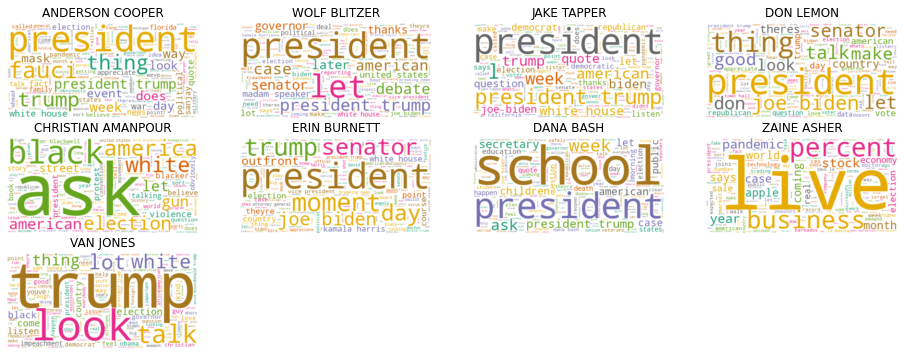

In [23]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ["ANDERSON COOPER", 'WOLF BLITZER', 'JAKE TAPPER', 'DON LEMON', 'CHRISTIAN AMANPOUR', 'ERIN BURNETT', 'DANA BASH','ZAINE ASHER', 'VAN JONES' ]
data_clean
# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_pickeled.transcripts[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

now lets try to see the unique words that each anchor had used


In [24]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,WOLF BLITZER,1130
7,ZAINE ASHER,1167
4,CHRISTIAN AMANPOUR,1412
6,DANA BASH,1448
5,ERIN BURNETT,1467
3,DON LEMON,1527
8,VAN JONES,1641
0,ANDERSON COOPER,1730
2,JAKE TAPPER,1885


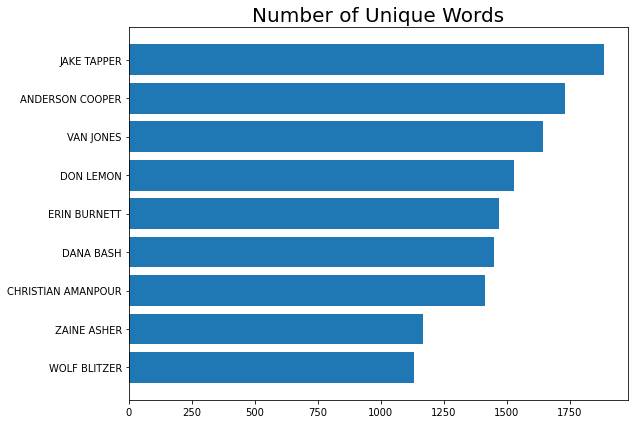

In [25]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

## 3.1 Interuptions
Lets plot the total number of interuptions as well as the number of times each anchor was interuptted.

In [26]:
total_interuptions=pd.DataFrame( columns=['show', 'anchors', 'interuptions'])

shows=["Anderson Cooper 360", "Amanpoor", 'CNN Tonight', "Erin Burnett Outfront", 'First Move', 'The Situation Room', 'State of the union-D','State of the union-J', 'The Van Jones Show']
total_interuptions['interuptions']=data_clean['total_interruptions']
total_interuptions['show']=shows
total_interuptions['anchors']=data_clean['names']
#total_interuptions.index=data_clean.index
total_interuptions
#data_clean
#data_clean['total_interruptions']

,show,anchors,interuptions
0,Anderson Cooper 360,"[COOPER, JONES, BURNETT, TAPPER]",15
1,Amanpoor,"[AMANPOUR, JONES, BASH]",40
2,CNN Tonight,[LEMON],61
3,Erin Burnett Outfront,"[BURNETT, BLITZER, BASH, TAPPER]",8
4,First Move,[ASHER],3
5,The Situation Room,"[BLITZER, BASH, TAPPER]",44
6,State of the union-D,"[BASH, TAPPER]",98
7,State of the union-J,[TAPPER],79
8,The Van Jones Show,[JONES],14


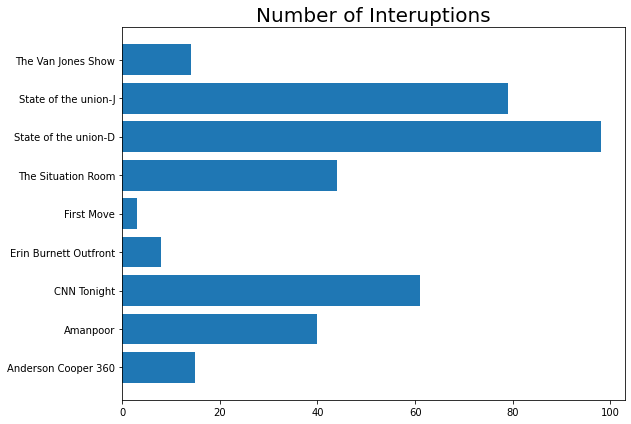

In [27]:
y_pos = np.arange(len(total_interuptions))

plt.subplot(1, 2, 1)
plt.barh(y_pos, total_interuptions.interuptions, align='center')
plt.yticks(y_pos, total_interuptions.show)
plt.title('Number of Interuptions', fontsize=20)

plt.tight_layout()
plt.show()

In [28]:
anchor_interuptions=pd.DataFrame( columns=[ 'anchor', 'interuptions'])
#data_pickeled
#shows=["Anderson Cooper 360", "Amanpoor", 'CNN Tonight', "Erin Burnett Outfront", 'First Move', 'The Situation Room', 'State of the union-D','State of the union-J']
anchor_interuptions['interuptions']=data_pickeled['total_interruptions']
#total_interuptions['show']=shows
anchor_interuptions['anchor']=data_pickeled['anchor']
#total_interuptions.index=data_clean.index
anchor_interuptions

,anchor,interuptions
anchor,,
COOPER,COOPER,3
BLITZER,BLITZER,27
TAPPER,TAPPER,35
LEMON,LEMON,24
AMANPOUR,AMANPOUR,17
BURNETT,BURNETT,1
BASH,BASH,53
ASHER,ASHER,0
JONES,JONES,8


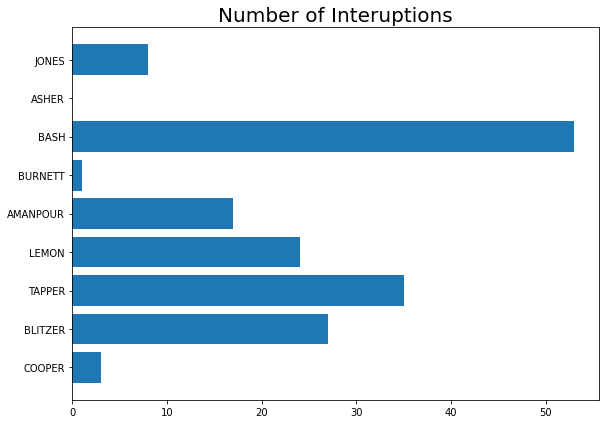

In [29]:
y_pos = np.arange(len(anchor_interuptions))

plt.subplot(1, 2, 1)
plt.barh(y_pos, anchor_interuptions.interuptions, align='center')
plt.yticks(y_pos, anchor_interuptions.anchor)
plt.title('Number of Interuptions', fontsize=20)

plt.tight_layout()
plt.show()

## STEP 4: NLP Techniques
### 4.1 Sentiment Analysis


In [30]:
data_raw=pd.DataFrame()
data_raw['anchor']=data_pickeled['anchor']
data_raw['transcript']=data_pickeled['transcripts']
data_raw.index=data_pickeled.index
data_raw

,anchor,transcript
anchor,,
COOPER,COOPER,well later in a news conference at the white house the president chose slightly different words basically implying that it was democrats who were...
BLITZER,BLITZER,yes as they say its better to be safe than sorry \n \nerica hill in new york thank you very much \n \ncnns kaitlan collins is over at the white h...
TAPPER,TAPPER,yes but why \n \n \n shattering norms\n \n it is completely disruptive and different than anything youve ever seen before\n breaking b...
LEMON,LEMON,he said that and you know some people would say that men are insulted by that and some people would say its fine i dont know \n \n\n i think its...
AMANPOUR,AMANPOUR,sports comes to a screeching halt over racial injustice major league players unite in unprecedented strike over the police shooting of \n \n jac...
BURNETT,BURNETT,and thanks so much to all of you for joining us anderson starts now \n \n \n \nanderson cooper cnn host anderson cooper good evening i hope ...
BASH,BASH,calling her pathetic exactly and so it seems as though again from jims reporting that since then her influence is waning \n \nyou kind of saw her...
ASHER,ASHER,right and also you see the fact that you know tech is playing a much bigger role now in the us economy than oil did say to years \n \n ago \n...
JONES,JONES,yes its i mean it beyond outrageous one thing that i will say is that right now because of whats happened this week with regard to the postal se...


In [31]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_raw['polarity'] = data_raw['transcript'].apply(pol)
data_raw['subjectivity'] = data_raw['transcript'].apply(sub)
data_raw

,anchor,transcript,polarity,subjectivity
anchor,,,,
COOPER,COOPER,well later in a news conference at the white house the president chose slightly different words basically implying that it was democrats who were...,0.054710,0.438690
BLITZER,BLITZER,yes as they say its better to be safe than sorry \n \nerica hill in new york thank you very much \n \ncnns kaitlan collins is over at the white h...,0.132422,0.430563
TAPPER,TAPPER,yes but why \n \n \n shattering norms\n \n it is completely disruptive and different than anything youve ever seen before\n breaking b...,0.120710,0.429041
LEMON,LEMON,he said that and you know some people would say that men are insulted by that and some people would say its fine i dont know \n \n\n i think its...,0.112417,0.488287
AMANPOUR,AMANPOUR,sports comes to a screeching halt over racial injustice major league players unite in unprecedented strike over the police shooting of \n \n jac...,0.074496,0.425925
BURNETT,BURNETT,and thanks so much to all of you for joining us anderson starts now \n \n \n \nanderson cooper cnn host anderson cooper good evening i hope ...,0.099167,0.459524
BASH,BASH,calling her pathetic exactly and so it seems as though again from jims reporting that since then her influence is waning \n \nyou kind of saw her...,0.129544,0.410334
ASHER,ASHER,right and also you see the fact that you know tech is playing a much bigger role now in the us economy than oil did say to years \n \n ago \n...,0.120693,0.423801
JONES,JONES,yes its i mean it beyond outrageous one thing that i will say is that right now because of whats happened this week with regard to the postal se...,0.076374,0.448895


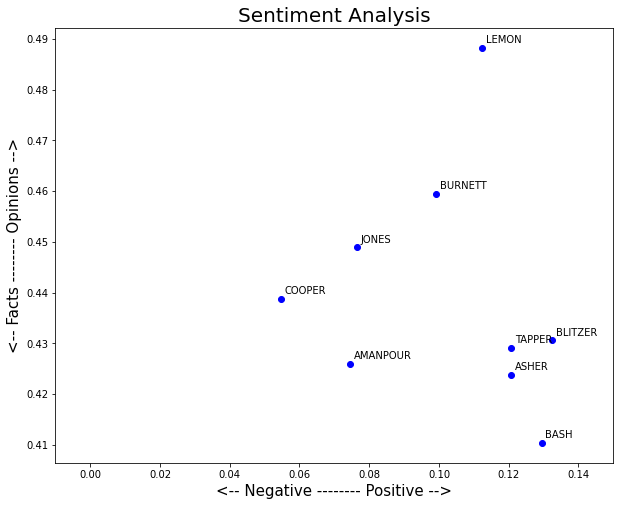

In [32]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, anchor in enumerate(data_raw.index):
    x = data_raw.polarity.loc[anchor]
    y = data_raw.subjectivity.loc[anchor]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_raw['anchor'][index], fontsize=10)
    plt.xlim(-.01, .15) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment over time

In [33]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [34]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data_raw.transcript:
    split = split_text(t, n=20)
    list_pieces.append(split)
    
#list_pieces

In [35]:

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
 

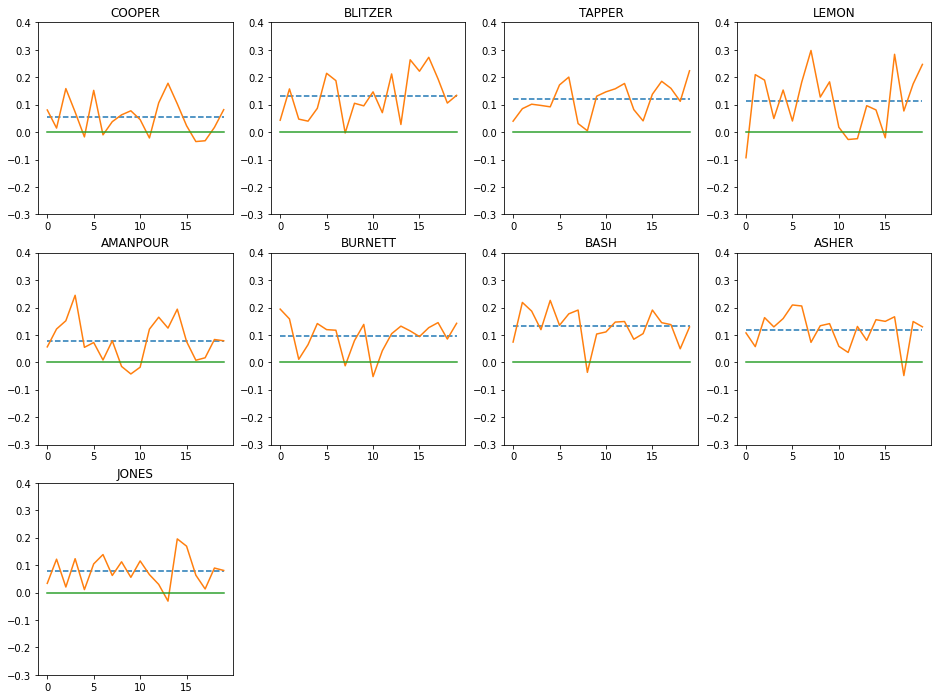

In [36]:
# Show the plot for all anchors with their average polarity shown in blue dash lines
plt.rcParams['figure.figsize'] = [16, 12]
x=np.arange(0,20,1)
for index, anchor in enumerate(data_raw.index):    
    plt.subplot(3, 4, index+1)
    y_mean = [np.mean(polarity_transcript[index]) for i in polarity_transcript[index]]
    #print(y_mean)
    plt.plot(x,y_mean, label='Mean', linestyle='--')
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data_raw['anchor'][index])
    plt.ylim(ymin=-.3, ymax=.4)
plt.show()

## 4.2 Topic Modeling

In [37]:
data_dtm_pick=pd.read_pickle('dtm_stop.pkl')

In [38]:
from gensim import matutils, models
import scipy.sparse

In [39]:
tdm=data_dtm_pick.transpose()
tdm.head()

anchor,COOPER,BLITZER,TAPPER,LEMON,AMANPOUR,BURNETT,BASH,ASHER,JONES
aap,0,0,0,0,0,0,1,0,0
abandoned,0,0,1,0,0,0,0,0,0
abbott,1,0,0,0,0,0,0,0,0
abby,5,5,0,3,0,3,0,0,0
abbys,1,0,0,0,0,0,0,0,0


In [40]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)


In [41]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [42]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.016*"president" + 0.016*"trump" + 0.006*"white" + 0.005*"biden" + 0.005*"house" + 0.004*"talk" + 0.004*"look" + 0.004*"lot" + 0.004*"week" + 0.004*"listen"'),
 (1,
  '0.010*"president" + 0.004*"trump" + 0.004*"week" + 0.004*"school" + 0.004*"secretary" + 0.004*"schools" + 0.004*"live" + 0.003*"states" + 0.003*"ask" + 0.003*"public"'),
 (2,
  '0.018*"president" + 0.008*"trump" + 0.005*"biden" + 0.005*"white" + 0.004*"election" + 0.003*"joe" + 0.003*"senator" + 0.003*"black" + 0.003*"political" + 0.003*"states"')]

In [43]:
#import nltk
#nltk.download('averaged_perceptron_tagger')

In [44]:
#import nltk
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_pickeled.transcripts.apply(nouns_adj))
data_nouns_adj



# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcripts)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()



[(0,
  '0.007*"impeachment" + 0.006*"foreign" + 0.005*"van" + 0.005*"tough" + 0.004*"party" + 0.004*"christian" + 0.004*"stuff" + 0.004*"voters" + 0.003*"mississippi" + 0.003*"guy"'),
 (1,
  '0.004*"voters" + 0.004*"debate" + 0.004*"women" + 0.004*"cases" + 0.004*"convention" + 0.003*"harris" + 0.003*"speaker" + 0.003*"court" + 0.003*"book" + 0.003*"america"'),
 (2,
  '0.005*"fauci" + 0.004*"david" + 0.004*"sanjay" + 0.004*"cases" + 0.004*"general" + 0.004*"medical" + 0.003*"mask" + 0.003*"event" + 0.003*"doctor" + 0.003*"business"'),
 (3,
  '0.007*"school" + 0.007*"schools" + 0.006*"secretary" + 0.006*"harris" + 0.006*"cases" + 0.005*"virus" + 0.005*"birx" + 0.004*"children" + 0.004*"attorney" + 0.004*"general"')]

In [45]:
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(2, 'COOPER'),
 (1, 'BLITZER'),
 (1, 'TAPPER'),
 (1, 'LEMON'),
 (1, 'AMANPOUR'),
 (3, 'BURNETT'),
 (3, 'BASH'),
 (2, 'ASHER'),
 (0, 'JONES')]